# Texture analysis


Texture has been the object of study for the last decades for the scientific community immersed in image processing. However, there is no consensus on its definition. From the definitions provided by different researchers we can say that the texture is a property related to the roguhness and/or change of reflectance of a surface and thus is characterized by the variation of pixel intensity in the spatial domain.

Texture can be found in images of a different nature, for example, a specific biological tissue (muscle or nervous tissue), a terrain area, the surface of an object or the skin of a person or animal. Therefore, the characterization of the texture in an image is necessary in different real scenarios. Specifically, texture plays a relevant role in tasks such as medical diagnosis, remote sensing or biometric identification.

In this tutorial we will see:

- Local binary Patterns (LBP)
- Gaussian filters
- Image similarity based on texture 

## 1. Local Binary Patterns (LBP)

It allows you to obtain a pixel-by-pixel transformation of the original image. The transformed value of a pixel is obtained from the comparison of its intensity value with neighboring pixels. Due to the ability of this operator to characterize the texture and its computational simplicity, LBPs have become a very common technique in various applications within image processing.
 
The most important property of the LBP operator in real world applications is its robustness to monotonous grayscale changes caused, for example, by variations in lighting or noise presence in the images.

<img src="images_notebook/LBP_steps.png">

Example of how it works


<img src="images_notebook/LBP_steps_1.png">

<img src="images_notebook/LBP_ex.png">




### Imports

In [1]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy
from skimage import filters
from skimage import io
import os
from skimage.util import img_as_float
from skimage.transform import resize
import skimage
from skimage.color import rgb2gray

%matplotlib inline


### Load images

In [2]:
img1 = img_as_float(io.imread('textures_images/lbp_textures/texture1.gif'))
img2 = img_as_float(io.imread('textures_images/lbp_textures/texture2.gif'))
img3 = img_as_float(io.imread('textures_images/lbp_textures/texture3.gif'))

In [3]:
#visualize
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')


def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray')
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray')
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray')




In [ ]:
visualize3(img1, img2, img3, 'Texture 1', 'Texture 2', 'Texture 3')

**Local binary pattern** is an invariant descriptor. Let's see the most important arguments:

- Image
- P: Number of circularly symmetric neighbour set points
- R: Radius of circle
- method: method to determine the pattern --> default, ror, uniform, nri_uniform, var

Check LBP scikit-image documentation  [scikit-image documentation](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.local_binary_pattern)


### LBP

In [ ]:

# settings for LBP
radius = 1
n_points = 8 * radius
METHOD = 'uniform'


def LBP(img1, img2, img3, radius, n_points, METHOD):
    
    def hist(ax, lbp):
        n_bins = int(lbp.max() + 1)
        return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                       facecolor='0.5')


    def kullback_leibler_divergence(p, q):
        p = np.asarray(p)
        q = np.asarray(q)
        filt = np.logical_and(p != 0, q != 0)
        return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


    def match(refs, img):
        best_score = 10
        best_name = None
        lbp = local_binary_pattern(img, n_points, radius, METHOD)
        n_bins = int(lbp.max() + 1)
        hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
        for name, ref in refs.items():
            ref_hist, _ = np.histogram(ref, density=True, bins=n_bins,
                                       range=(0, n_bins))
            score = kullback_leibler_divergence(hist, ref_hist)
            if score < best_score:
                best_score = score
                best_name = name
        return best_name


    refs = {
        'img1': local_binary_pattern(img1, n_points, radius, METHOD),
        'img2': local_binary_pattern(img2, n_points, radius, METHOD),
        'img3': local_binary_pattern(img3, n_points, radius, METHOD)
    }

    # classify rotated textures
    print('Rotated images matched against references using LBP:')
    print('original: img1, rotated: 30deg, match result: ',
          match(refs, rotate(img1, angle=30, resize=False)))
    print('original: img2, rotated: 70deg, match result: ',
          match(refs, rotate(img2, angle=70, resize=False)))
    print('original: img3, rotated: 145deg, match result: ',
          match(refs, rotate(img3, angle=145, resize=False)))

    # plot histograms of LBP of textures
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
                                                           figsize=(9, 6))
    plt.gray()

    ax1.imshow(img1)
    ax1.axis('off')
    hist(ax4, refs['img1'])
    ax4.set_ylabel('Percentage')

    ax2.imshow(img2)
    ax2.axis('off')
    hist(ax5, refs['img2'])
    ax5.set_xlabel('Uniform LBP values')

    ax3.imshow(img3)
    ax3.axis('off')
    hist(ax6, refs['img3'])

    plt.show()
    
LBP(img1, img2, img3, radius, n_points, METHOD)

**Exercise:** Why do we have 26 labels?

**Exercise:** What does the label 25 mean? And the label 26?

What is the [Kullback-Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) divergence doing?

Now test the same images changing the radius and the number of points.

**Exercise:** What happens if you increase the radius? And the number of points?

### Rotated LBP

In [ ]:
from skimage.transform import rotate
rotated_img1 = rotate(img1, angle=30, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
rotated_img2 = rotate(img2, angle=145, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
rotated_img3 = rotate(img3, angle=90, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)

In [ ]:
LBP(rotated_img1, rotated_img2, rotated_img3, radius, n_points, METHOD)

**Exercise:** Is it invariable to rotation? The histogram is the same as the image without rotating?

**Exercise:** Which label has more pronunciation? Why?

### Rescaled LBP

In [ ]:
from skimage.transform import rescale
rescaled_img1 = rescale(img1,.5)
rescaled_img2 = rescale(img2,.5)
rescaled_img3 = rescale(img3,.5)

In [ ]:
LBP(rescaled_img1, rescaled_img2, rescaled_img3, radius, n_points, METHOD)

**Exercise:** Does the rescaling affect the results?

### Intensity rescaled LBP

In [ ]:
intensity_rescaled_img1 = img1/2
intensity_rescaled_img2 = img2/2
intensity_rescaled_img3 = img3/2

In [ ]:
LBP(intensity_rescaled_img1, intensity_rescaled_img2, intensity_rescaled_img3, radius, n_points, METHOD)

**Exercise:** Does the intesitiy rescaling affect the results?

## Compute LBP in different images

### Load images

In [ ]:
x = 300
y = 300

img4 = img_as_float(rgb2gray(resize(io.imread('textures_images/lbp_textures/adrien.jpg'), (x,y))))
img5 = img_as_float(rgb2gray(resize(io.imread('textures_images/lbp_textures/nature.jpeg'), (x,y))))
img6 = img_as_float(rgb2gray(resize(io.imread('textures_images/lbp_textures/mila.jpg'), (x,y))))

In [ ]:
fig, ax= plt.subplots(ncols=3, nrows=1, figsize=(20,30))

ax[0].imshow(img4, cmap='gray')
ax[0].set_title('Texture 1')
ax[1].imshow(img5, cmap='gray')
ax[1].set_title('Texture 2')
ax[2].imshow(img6, cmap='gray')
ax[2].set_title('Texture 3')
plt.show()

### LBP

In [ ]:
LBP(img4, img5, img6, radius, n_points, METHOD)

### Rotated LBP

In [ ]:
rotated_img4 = rotate(img4, angle=30, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
rotated_img5 = rotate(img5, angle=145, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)
rotated_img6 = rotate(img6, angle=90, resize=False, center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)

In [ ]:
LBP(rotated_img4, rotated_img5, rotated_img6, radius, n_points, METHOD)

### Rescaled LBP

In [ ]:
rescaled_img4 = rescale(img4,.5)
rescaled_img5 = rescale(img5,.5)
rescaled_img6 = rescale(img6,.5)

In [ ]:
LBP(rescaled_img4, rescaled_img5, rescaled_img6, radius, n_points, METHOD)

### Intensity rescaled LBP

In [ ]:
intensity_rescaled_img4 = img4/2
intensity_rescaled_img5 = img5/2
intensity_rescaled_img6 = img6/2

In [ ]:
LBP(intensity_rescaled_img4, intensity_rescaled_img5, intensity_rescaled_img6, radius, n_points, METHOD)

## 2. Leung-Malik filter bank (Gaussian filters)

We can apply a collection of multiple filters that we call a filter bank. Note that if we apply $D$ filters our feature vectors will be $D$ dimensional.

The following image shows a filter bank. In the filter bank we typically want filters to capture a combination of scales, orientations of different types of patterns. This particular filter bank is The Leung-Malik (LM) Filter Bank.

<img src="images_notebook/filter_bank.png">

### Load & resize images

In [4]:
# Resize dimension 250 x 250
x = 250
y = 250

# Load images: pets, sculptures, flowers
path = "./textures_images/pets/"                       
pets_images = [resize(skimage.io.imread(path + f), (x, y)) for f in os.listdir(path)]

path = "./textures_images/sculptures/"
sculptures_images = [resize(skimage.io.imread(path + f), (x, y)) for f in os.listdir(path)]

path = "./textures_images/flowers/"
flowers_images = [resize(skimage.io.imread(path + f), (x, y)) for f in os.listdir(path)]

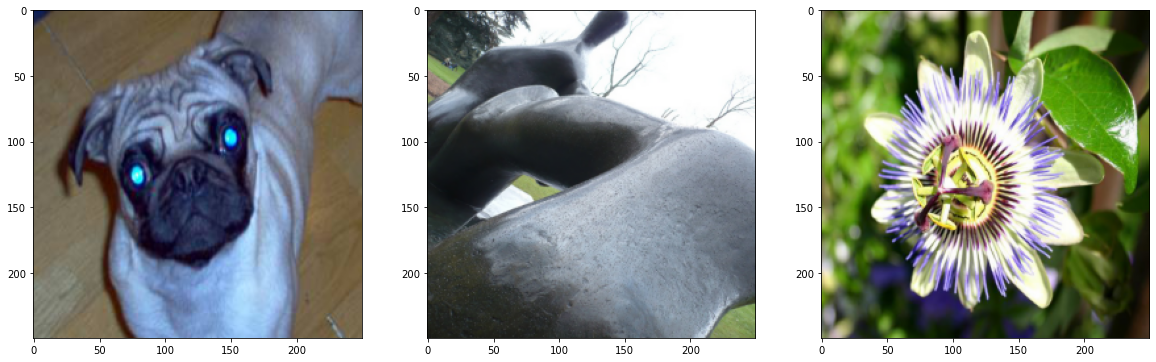

In [5]:
fig, ax= plt.subplots(ncols=3, nrows=1, figsize=(20,30))

ax[0].imshow(pets_images[0])
ax[1].imshow(sculptures_images[0])
ax[2].imshow(flowers_images[0])
plt.show()

In [6]:
import LM_filters

LM filters imported, the shape of the filter bank is:  (49, 49, 48)


In [7]:
# Load filters
filter_bank = LM_filters.makeLMfilters()
filter_bank.shape

(49, 49, 48)

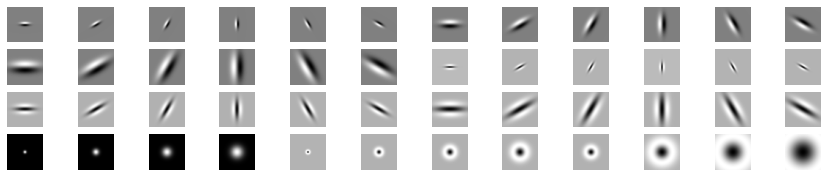

In [8]:
n_filters = filter_bank.shape[-1]

fig, ax = plt.subplots(ncols=12, nrows=4, figsize=(15,3))

k = 0
for i in range(4):
    for j in range(12):
        ax[i,j].imshow(filter_bank[:,:,k], cmap = 'gray')
        ax[i,j].axis("off")
        k = k + 1

### Apply filters to different images

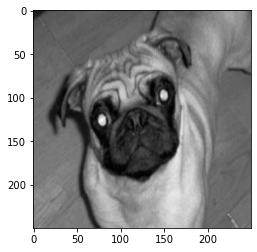

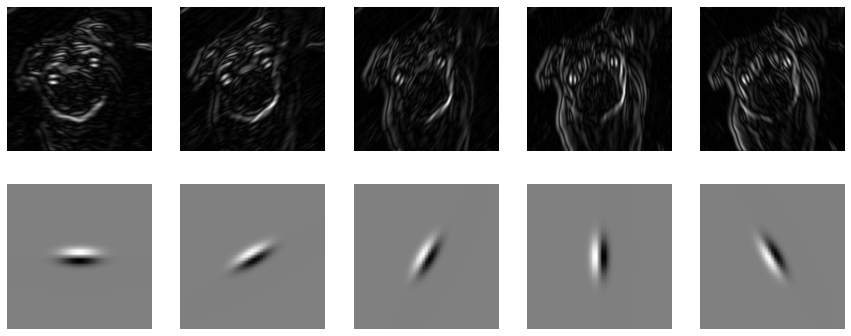

In [9]:
def visualize_features(im,  filter_bank, n_filters=5):

    ### Apply first 5 filters from the filter bank
    fig, ax = plt.subplots(ncols=n_filters, nrows=2, figsize=(15,6))

    for i in range(n_filters):
        n_filter = i
        im_conv = np.zeros(im.shape)
        mask = filter_bank[:,:,n_filter]

        scipy.ndimage.convolve(im, mask, output=im_conv)
        ax[0,i].imshow(np.abs(im_conv),cmap='gray')
        ax[0,i].axis("off")

        ax[1,i].imshow( filter_bank[:,:,n_filter], cmap="gray")
        ax[1,i].axis("off")
        
im = pets_images[0]
im = skimage.color.rgb2gray(im)
im = im/im.max()
plt.imshow(im, cmap="gray")
visualize_features(im, filter_bank)


**Exercise:** Apply different filters on the same image. What are the differences? What is happening? 

**Exercise:** Apply a different number of filters. Do we get a better result? 

**Exercise:** Make the same changes to the other image sets (flowers and scultpures). Can we draw the same conclusions?

### Feature vector from the filter bank

 The returned vector must contain at position $k$ the mean of the absolute value of the convolved image by filter $k$.

$$
\text{feat}(x) = \left( \text{mean}( |r_1|), \dots,\text{mean}(|r_D|) \right)
$$

In [ ]:

def features_from_filter_bank(image, filter_bank, n_filters):
    
    ## Complete this function
    
    im_conv = np.zeros(image.shape)
    features_for_im = np.zeros(n_filters)
  
    return features_for_im

features_for_im = features_from_filter_bank(im, filter_bank, n_filters)

### Compare similarity between images

Let us assume $f(x) \in \mathbb{R}^D$ represents a set of features for $x$. Given a query image $x$ and another image $x^m$ from the database, we can compute the distance between images as
$$
\text{distance}\left( f(x) , \, f(x^m) \right) = \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 =  \sqrt{ \sum_{d=1}^\text{D} \left( f(x)_d - f(x^m)_d  \right)^2 }
$$


In [ ]:
im1 = skimage.color.rgb2gray(pets_images[0])
im2 = skimage.color.rgb2gray(flowers_images[0])
features_for_im1 = features_from_filter_bank(im1, filter_bank, n_filters)
features_for_im2 = features_from_filter_bank(im2, filter_bank, n_filters)
distance = np.sqrt(np.sum((features_for_im1 - features_for_im2)**2))